## Imports

In [103]:
import re
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Utils

In [104]:
def parse_performance_data(text):
    pattern = re.compile(
        r"Algorithm:\s*(?P<Algorithm>\S+)\s*"
        r"Instance:\s*(?P<Instance>\S+)\s*"
        r"Initial Score:\s*(?P<Initial_Score>\d+)\s*"
        r"Score:\s*(?P<Score>\d+)\s*"
        r"Number\s*of\s*Evaluations:\s*(?P<Number_of_Evaluations>\d+)\s*"
        r"Number\s*of\s*Performed\s*Moves:\s*(?P<Number_of_Performed_Moves>\d+)\s*"
        r"Number\s*of\s*Best\s*Solution\s*Updates:\s*(?P<Number_of_Best_Solution_Updates>\d+)\s*"
        r"Solution:\s*(?P<Solution>[\d\s]+)\s*"
        r"Optimal\s*Score:\s*(?P<Optimal_Score>\d+)\s*"
        r"Optimal\s*Solution:\s*(?P<Optimal_Solution>[\d\s]+)"
    )
    
    rows = []
    for match in pattern.finditer(text):
        row = match.groupdict()
        rows.append(row)
    
    df = pd.DataFrame(rows)
    
    numerical_cols = ['Initial_Score', 'Score', 'Number_of_Evaluations', 'Number_of_Performed_Moves', 'Number_of_Best_Solution_Updates', 'Optimal_Score']
    df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric)
    
    return df

def parse_runtime_data(text):
    pattern = re.compile(
        r"Algorithm:\s*(?P<Algorithm>\S+)\s*"
        r"Instance:\s*(?P<Instance>\S+)\s*"
        r"Runtime:\s*(?P<Runtime>\S+)\s*"
    )
    
    rows = []
    for match in pattern.finditer(text):
        row = match.groupdict()
        rows.append(row)
    
    df = pd.DataFrame(rows)
    
    numerical_cols = ['Runtime']
    df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric)
    
    return df

## Read Data

In [173]:
RANDOMRUNTIME = 2871222.0

In [105]:
with open('results/performance_results.txt', 'r') as file:
    data = file.read()

df_performance = parse_performance_data(data)
df_performance.Algorithm = df_performance.Algorithm.apply(lambda x: x[1:] if x.endswith("LS") else x)


In [106]:
df_performance.tail()

,Algorithm,Instance,Initial_Score,Score,Number_of_Evaluations,Number_of_Performed_Moves,Number_of_Best_Solution_Updates,Solution,Optimal_Score,Optimal_Solution
4795,steepestLS,bur26h,7747823,7098905,7150,21,21,21 2 15 11 5 7 9 14 0 20 19 6 3 17 13 24 18 8 ...,7098658,11 2 13 12 6 10 25 8 1 21 4 20 7 18 14 15 9 19...
4796,steepestLS,bur26h,8276596,7123039,8775,26,26,5 12 1 15 11 24 0 9 2 14 18 17 19 3 10 20 4 8 ...,7098658,11 2 13 12 6 10 25 8 1 21 4 20 7 18 14 15 9 19...
4797,steepestLS,bur26h,7995157,7153247,7800,23,23,1 23 7 5 6 12 25 13 2 10 8 4 18 0 14 15 19 17 ...,7098658,11 2 13 12 6 10 25 8 1 21 4 20 7 18 14 15 9 19...
4798,steepestLS,bur26h,7732397,7099512,6500,19,19,22 10 1 12 5 23 16 14 0 20 19 3 6 17 11 9 18 8...,7098658,11 2 13 12 6 10 25 8 1 21 4 20 7 18 14 15 9 19...
4799,steepestLS,bur26h,7763367,7124989,7800,23,23,9 21 10 2 5 16 23 20 0 8 17 19 3 11 22 14 18 6...,7098658,11 2 13 12 6 10 25 8 1 21 4 20 7 18 14 15 9 19...


In [107]:
with open('results/runtime_results.txt', 'r') as file:
    data = file.read()

df_runtime = parse_runtime_data(data)

In [108]:
df_runtime.head()

,Algorithm,Instance,Runtime
0,heuristic,bur26a,6122.0
1,heuristic,bur26a,9695.0
2,heuristic,bur26a,5778.0
3,heuristic,bur26a,10452.0
4,heuristic,bur26a,5695.0


In [109]:
df_runtime[df_runtime.Algorithm == "greedyLS"].Runtime.mean()

3058801.625

# Analysis

### Problem Description
#### 8 Selected instances:

R.E. Burkard and J. Offermann [BuOf:77]
The data of the first matrix correspond to the typing-time of an average stenotypist, while the second matrix describes the frequency of pairs of letters in different languages taken over 100,000 pairs for examples a-f and over 187,778 pairs for examples g-h. (Note that the solutions are not scaled for a flow matrix of 100,000 pairs anymore.) One also distinguishes between two types of typewriter keyboards. The instances are asymmetric.

##### TODO Change this - select different size instances
Selected due to the fact that all instances are of the same size. -- IDK CZY TO DOBRY WYBOR<br>
***Bur26a, Bur26b, Bur26c, Bur26d, Bur26e, Bur26f, Bur26g, Bur26h***

#### Neighborhood used: pair swap
#### Neighborhood size: n(n-1)/2 

#### Comparison of the performance of 5 algorithms and implemented types of neighborhoods on all problem instances – plots

- Running time (average)
- Quality = distance from the optimum (according to what measure?), the average and the best case (optionally: also the worst case).
- Efficiency of algorithms (average) – i.e., quality over time (suggest a good measure and justify your choice)
- G,S: average number of algorithm steps (step = changing the current solution)
- G,S,RS,RW: average number of evaluated (i.e., visited – full or partial evaluation) solutions

For the averages, we assess the stability of the results (standard deviations should always be shown along with the averages).

In [222]:
len(df_performance.Solution.iloc[0].split(" "))

27

In [110]:
instances = df_performance.Instance.unique()

## Runtime

In [111]:
def plot_algorithms(summary, title="Measure"):
    # Set up the plot
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")

    # Plot each algorithm separately
    algorithms = summary["Algorithm"].unique()
    colors = sns.color_palette("tab10", len(algorithms))

    for i, algorithm in enumerate(algorithms):
        subset = summary[summary["Algorithm"] == algorithm]
        plt.plot(subset["Instance"], subset["mean"], label=f"{algorithm} (Mean)", color=colors[i], marker="o", linestyle="-")
        plt.fill_between(subset["Instance"], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2, color=colors[i])

    # Labels and legend
    plt.xlabel("Instance")
    plt.ylabel(title)
    plt.title(f"Algorithm {title} per Instance with Standard Deviation")
    plt.legend()
    plt.xticks(rotation=45)  # Rotate instance labels for better readability
    plt.show()

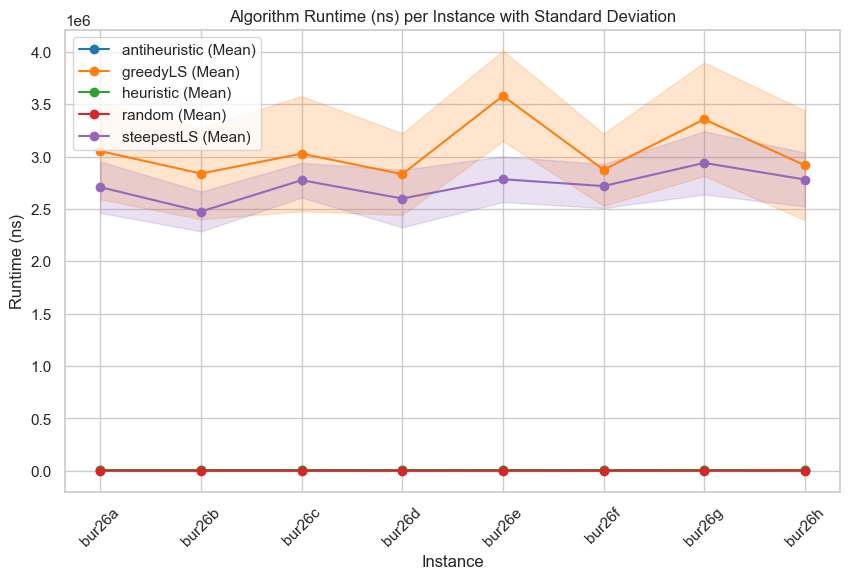

In [ ]:
summary = df_runtime.groupby(["Algorithm", "Instance"])["Runtime"].agg(["mean", "std"]).reset_index()
plot_algorithms(summary, title="Runtime [ns]")

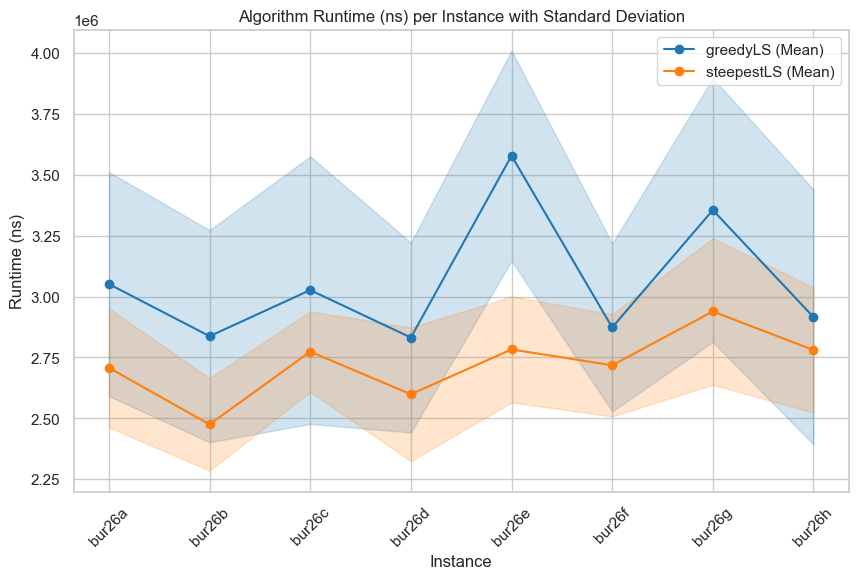

In [ ]:
ls_algorithms = summary[summary["Algorithm"].str.contains("LS")]
plot_algorithms(ls_algorithms, title="Runtime [ns]")

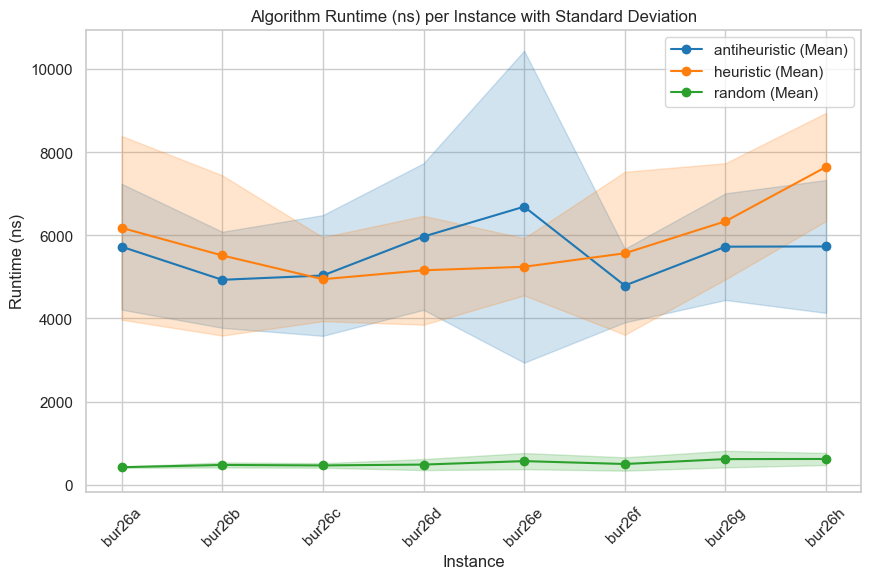

In [ ]:
non_ls_algorithms = summary[~summary["Algorithm"].str.contains("LS")]
plot_algorithms(non_ls_algorithms, title="Runtime [ns]")

## Quality

In [115]:
df_performance["Solution_Quality"] = (df_performance["Score"] - df_performance["Optimal_Score"]) / df_performance["Optimal_Score"]

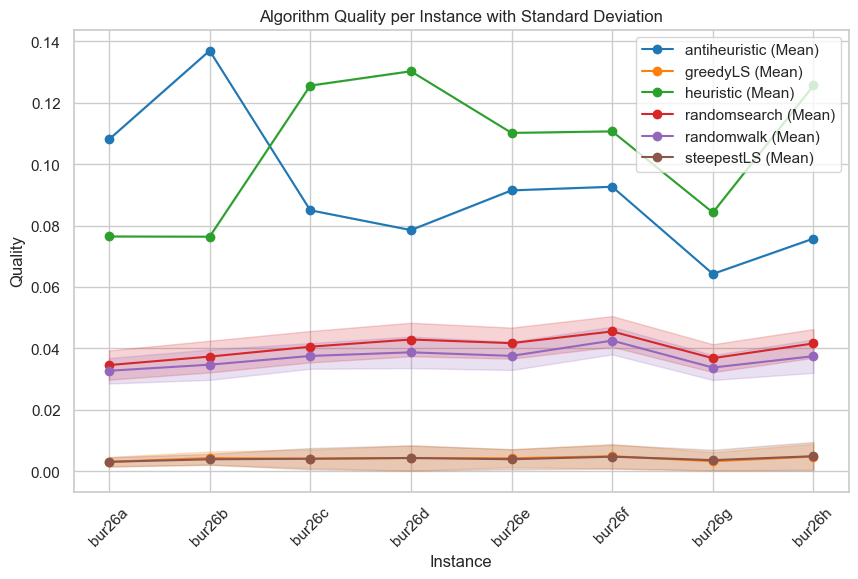

In [116]:
summary = df_performance.groupby(["Algorithm", "Instance"])["Solution_Quality"].agg(["mean", "std"]).reset_index()
plot_algorithms(summary, title="Quality")

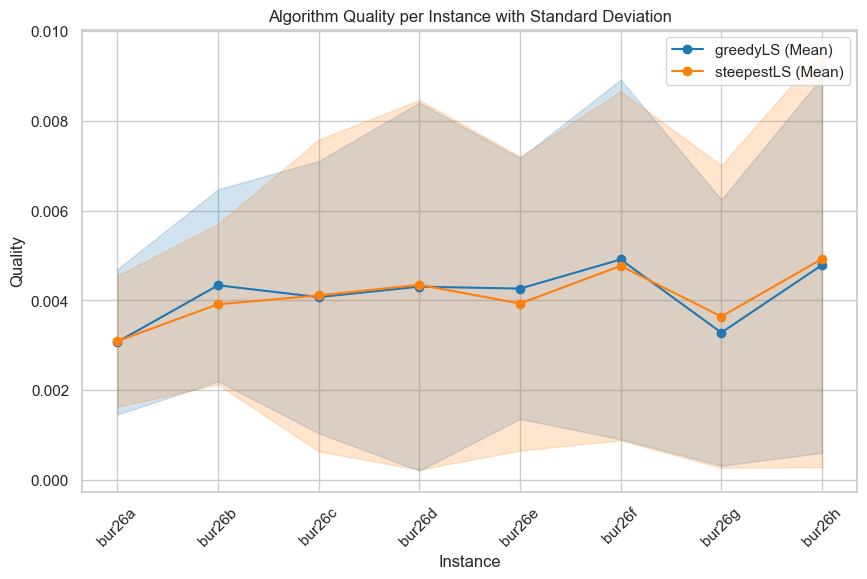

In [117]:
non_ls_algorithms = summary[summary["Algorithm"].str.contains("LS")]
plot_algorithms(non_ls_algorithms, title="Quality")

## Efficiency

In [ ]:
df_runtime_summary = df_runtime.groupby(["Algorithm", "Instance"]).agg(
    mean_runtime=("Runtime", "mean"),
    std_runtime=("Runtime", "std")
).reset_index()

df_combined = df_performance.merge(df_runtime_summary, on=["Algorithm", "Instance"], how="left")

df_combined["Solution_Quality"] = (df_combined["Score"] - df_combined["Optimal_Score"]) / df_combined["Optimal_Score"]

df_combined.loc[df_combined["Algorithm"].isin(["randomwalk", "randomsearch"]), "mean_runtime"] = RANDOMRUNTIME
df_combined.loc[df_combined["Algorithm"].isin(["randomwalk", "randomsearch"]), "std_runtime"] = 0.0

df_combined.head()

,Algorithm,Instance,Initial_Score,Score,Number_of_Evaluations,Number_of_Performed_Moves,Number_of_Best_Solution_Updates,Solution,Optimal_Score,Optimal_Solution,Solution_Quality,mean_runtime,std_runtime
0,heuristic,bur26a,0,5841774,1,1,1,16 14 10 25 9 21 12 24 18 1 20 6 13 17 11 0 3 ...,5426670,11 15 26 7 4 13 12 2 6 18 9 5 1 21 8 14 3 20 1...,0.076493,6181.8,2212.613477
1,heuristic,bur26a,0,5841774,1,1,1,16 14 10 25 9 21 12 24 18 1 20 6 13 17 11 0 3 ...,5426670,11 15 26 7 4 13 12 2 6 18 9 5 1 21 8 14 3 20 1...,0.076493,6181.8,2212.613477
2,heuristic,bur26a,0,5841774,1,1,1,16 14 10 25 9 21 12 24 18 1 20 6 13 17 11 0 3 ...,5426670,11 15 26 7 4 13 12 2 6 18 9 5 1 21 8 14 3 20 1...,0.076493,6181.8,2212.613477
3,heuristic,bur26a,0,5841774,1,1,1,16 14 10 25 9 21 12 24 18 1 20 6 13 17 11 0 3 ...,5426670,11 15 26 7 4 13 12 2 6 18 9 5 1 21 8 14 3 20 1...,0.076493,6181.8,2212.613477
4,heuristic,bur26a,0,5841774,1,1,1,16 14 10 25 9 21 12 24 18 1 20 6 13 17 11 0 3 ...,5426670,11 15 26 7 4 13 12 2 6 18 9 5 1 21 8 14 3 20 1...,0.076493,6181.8,2212.613477


In [ ]:
def plot_efficiency(summary, legend=True, show_instances=True):
    # Set up plot
    plt.figure(figsize=(15, 6))
    sns.set_theme(style="whitegrid")

    # Get unique algorithms and instances
    algorithms = summary["Algorithm"].unique()
    instances = summary["Instance"].unique()
    colors = sns.color_palette("tab10", len(algorithms))
    markers = ["o", "s", "D", "v", "^"]  # Different markers for instances
    
    # Dictionary to track if an algorithm has been added to the legend
    algorithm_legend = {}

    # Plot each algorithm-instance pair
    for i, algorithm in enumerate(algorithms):
        for j, instance in enumerate(instances):
            subset = summary[(summary["Algorithm"] == algorithm) & (summary["Instance"] == instance)]
            if not subset.empty:
                if show_instances:
                    label = label=f"{algorithm} - {instance}"
                else:
                    label = algorithm if algorithm not in algorithm_legend else "_nolegend_"
                plt.errorbar(
                    subset["mean_quality"], subset["mean_runtime"],
                    xerr=subset["std_quality"], yerr=subset["std_runtime"],
                    fmt=markers[j % len(markers)], color=colors[i], label=label,
                    capsize=3, linestyle="none"
                )
                algorithm_legend[algorithm] = True

    # Labels and legend
    plt.ylabel("Runtime [ns] (Mean ± Std)")
    plt.xlabel("Solution Quality (Mean ± Std)")
    plt.title("Algorithm Performance: Runtime vs. Solution Quality")
    if legend:
        plt.legend(loc="upper right", fontsize=9, ncol=5)
    plt.show()


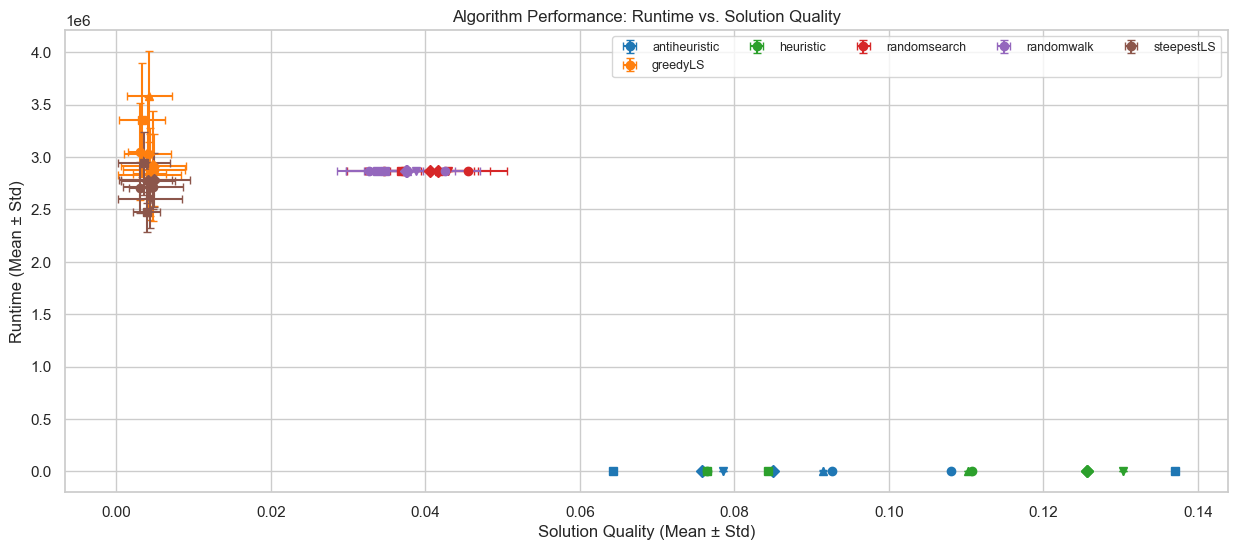

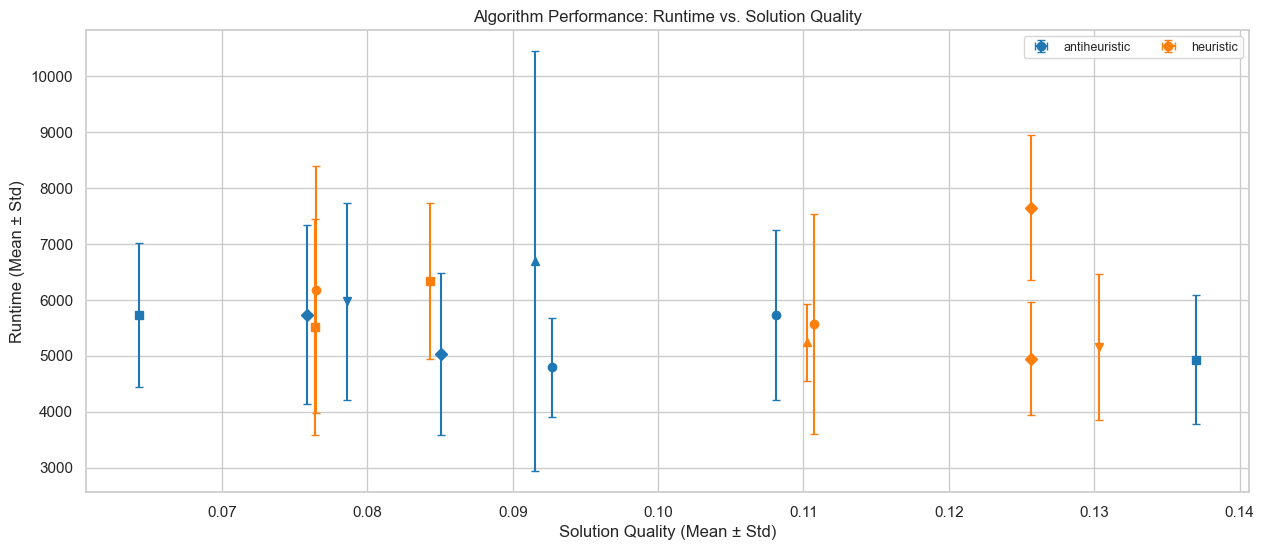

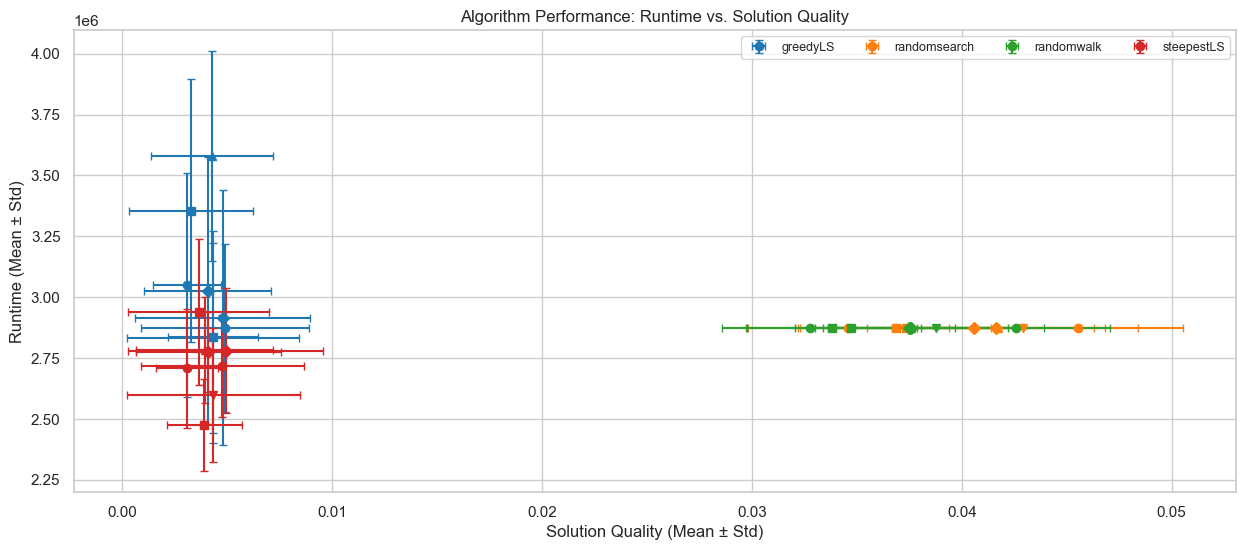

In [171]:
summary = df_combined.groupby(["Algorithm", "Instance"]).agg(
    mean_runtime=("mean_runtime", "mean"),
    std_runtime=("std_runtime", "mean"),
    mean_quality=("Solution_Quality", "mean"),
    std_quality=("Solution_Quality", "std")
).reset_index()

non_ls_algorithms = summary[~summary["Algorithm"].str.contains("LS|random")]
ls_algorithms = summary[summary["Algorithm"].str.contains("LS|random")]

plot_efficiency(summary, show_instances=False)
plot_efficiency(non_ls_algorithms, show_instances=False)
plot_efficiency(ls_algorithms, show_instances=False)

## Number of Moves/Evaluations/Best Solution Updates

In [172]:
df_performance.head()

,Algorithm,Instance,Initial_Score,Score,Number_of_Evaluations,Number_of_Performed_Moves,Number_of_Best_Solution_Updates,Solution,Optimal_Score,Optimal_Solution,Solution_Quality
0,heuristic,bur26a,0,5841774,1,1,1,16 14 10 25 9 21 12 24 18 1 20 6 13 17 11 0 3 ...,5426670,11 15 26 7 4 13 12 2 6 18 9 5 1 21 8 14 3 20 1...,0.076493
1,heuristic,bur26a,0,5841774,1,1,1,16 14 10 25 9 21 12 24 18 1 20 6 13 17 11 0 3 ...,5426670,11 15 26 7 4 13 12 2 6 18 9 5 1 21 8 14 3 20 1...,0.076493
2,heuristic,bur26a,0,5841774,1,1,1,16 14 10 25 9 21 12 24 18 1 20 6 13 17 11 0 3 ...,5426670,11 15 26 7 4 13 12 2 6 18 9 5 1 21 8 14 3 20 1...,0.076493
3,heuristic,bur26a,0,5841774,1,1,1,16 14 10 25 9 21 12 24 18 1 20 6 13 17 11 0 3 ...,5426670,11 15 26 7 4 13 12 2 6 18 9 5 1 21 8 14 3 20 1...,0.076493
4,heuristic,bur26a,0,5841774,1,1,1,16 14 10 25 9 21 12 24 18 1 20 6 13 17 11 0 3 ...,5426670,11 15 26 7 4 13 12 2 6 18 9 5 1 21 8 14 3 20 1...,0.076493


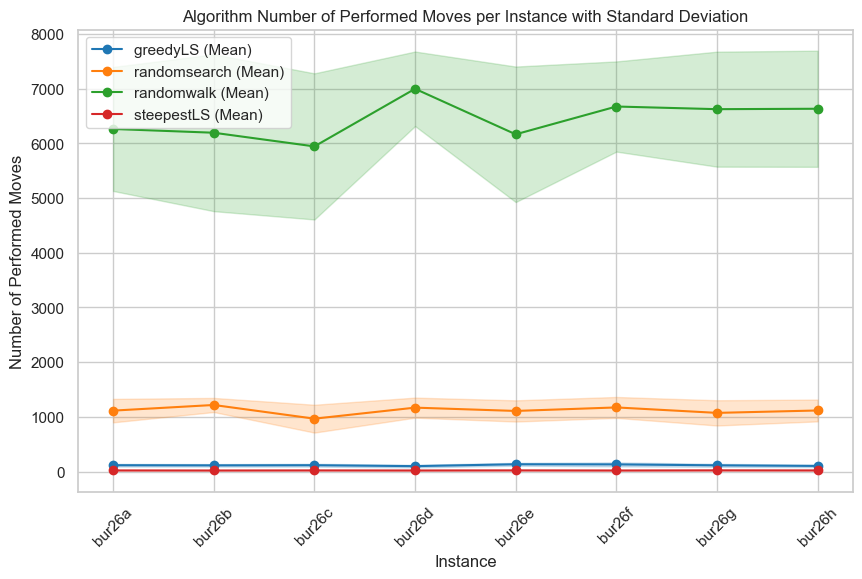

In [176]:
summary = df_performance.groupby(["Algorithm", "Instance"])["Number_of_Performed_Moves"].agg(["mean", "std"]).reset_index()
summary = summary[~summary["Algorithm"].str.contains("heuristic")]
plot_algorithms(summary, title="Number of Performed Moves")

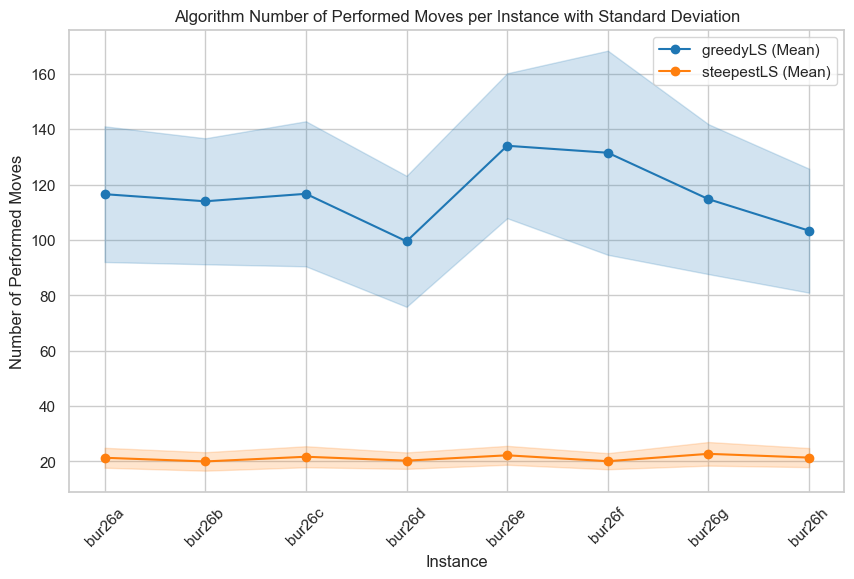

In [177]:
ls_algorithms = summary[summary["Algorithm"].str.contains("LS")]
plot_algorithms(ls_algorithms, title="Number of Performed Moves")

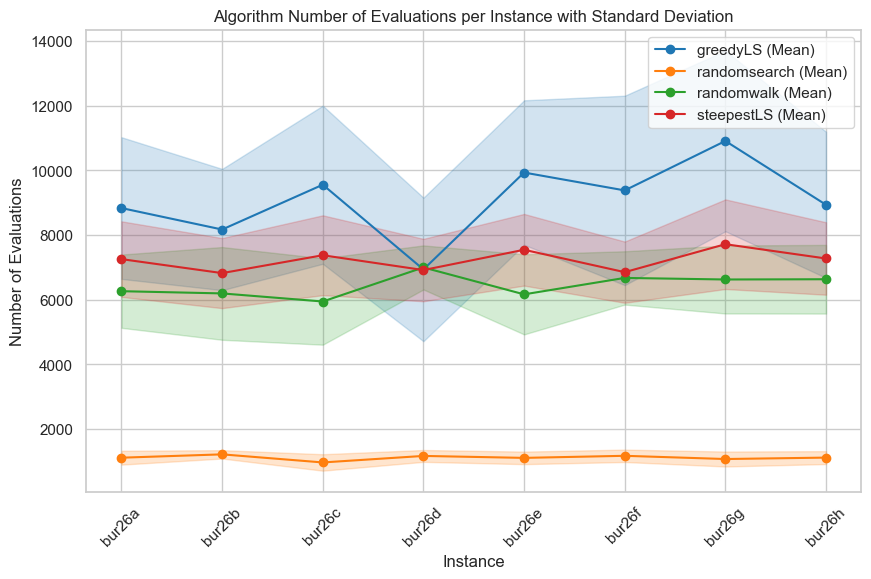

In [192]:
summary = df_performance.groupby(["Algorithm", "Instance"])["Number_of_Evaluations"].agg(["mean", "std"]).reset_index()
summary = summary[~summary["Algorithm"].str.contains("heuristic")]
plot_algorithms(summary, title="Number of Evaluations")

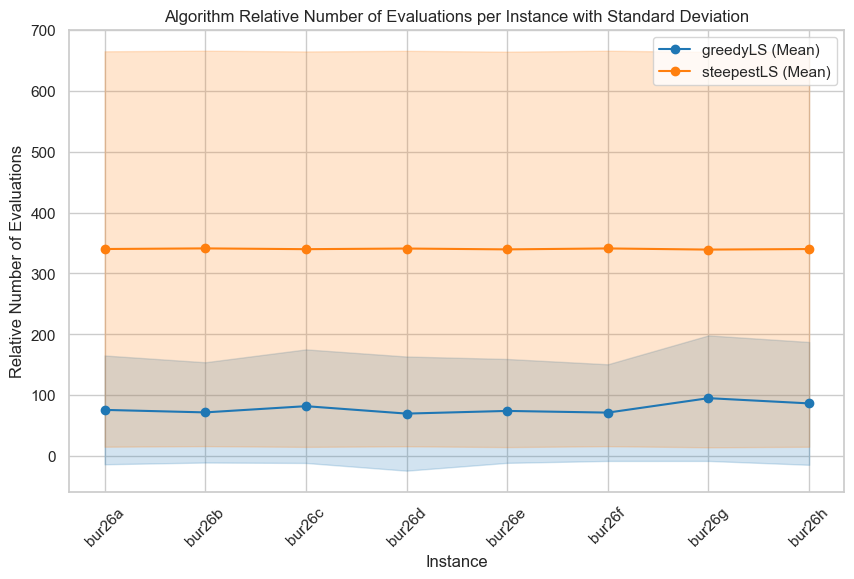

In [ ]:
summary = df_performance.groupby(["Algorithm", "Instance"])[["Number_of_Evaluations", "Number_of_Performed_Moves"]].agg(["mean", "std"]).reset_index()
summary.columns = ['_'.join(col).strip('_') for col in summary.columns]

summary["Relative_Evaluations_mean"] = summary["Number_of_Evaluations_mean"] / summary["Number_of_Performed_Moves_mean"]
summary["Relative_Evaluations_std"] = summary["Number_of_Evaluations_std"] / summary["Number_of_Performed_Moves_std"]

summary = summary[["Algorithm", "Instance", "Relative_Evaluations_mean", "Relative_Evaluations_std"]]
summary = summary.rename(columns={"Relative_Evaluations_mean": "mean", "Relative_Evaluations_std": "std"})

summary = summary[summary["Algorithm"].str.contains("LS")]

plot_algorithms(summary, "Relative Number of Evaluations")

In [205]:
df_performance.columns

Index(['Algorithm', 'Instance', 'Initial_Score', 'Score',
       'Number_of_Evaluations', 'Number_of_Performed_Moves',
       'Number_of_Best_Solution_Updates', 'Solution', 'Optimal_Score',
       'Optimal_Solution', 'Solution_Quality'],
      dtype='object')

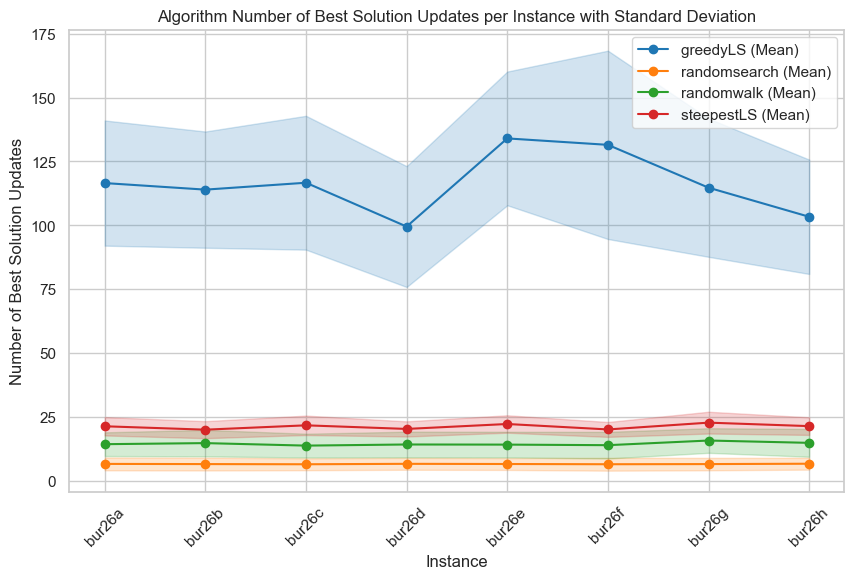

In [206]:
summary = df_performance.groupby(["Algorithm", "Instance"])["Number_of_Best_Solution_Updates"].agg(["mean", "std"]).reset_index()
summary = summary[~summary["Algorithm"].str.contains("heuristic")]
plot_algorithms(summary, title="Number of Best Solution Updates")

## Initial Solution Comparison

In [216]:
def plot_ls_algorithms_comparison(df):\
    # Set up plot
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")

    # Scatter plot with different colors per algorithm
    sns.scatterplot(
        data=df,
        x="Initial_Score",
        y="Score",
        hue="Instance",
        palette="tab10",
        alpha=0.4  # Slight transparency for better visibility
    )

    # Labels and title
    plt.xlabel("Initial Solution Score")
    plt.ylabel("Final Solution Score")
    plt.title("Comparison of LS Algorithms: Initial vs. Final Solution Score")
    plt.legend(title="Algorithm", loc="upper left", bbox_to_anchor=(1, 1))  # Move legend outside

    # Show plot
    plt.show()

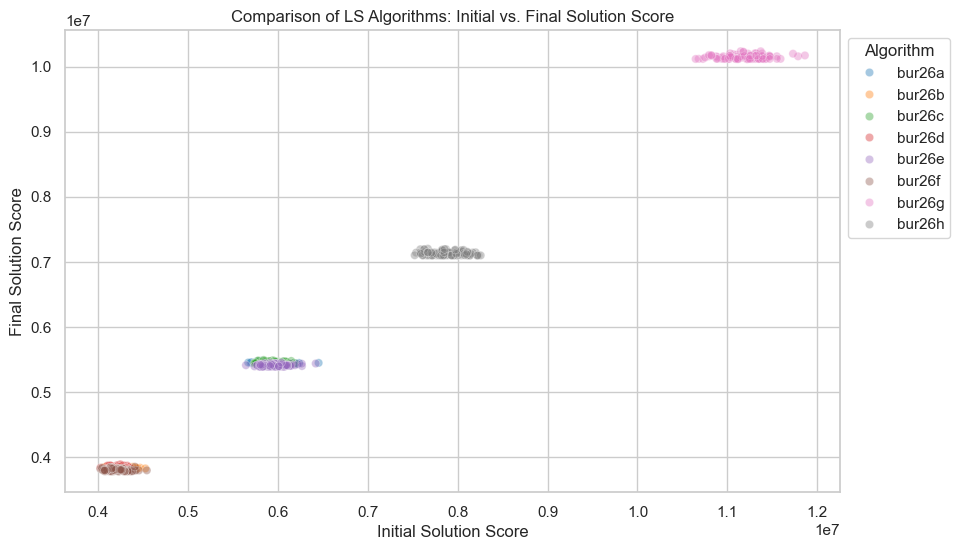

In [217]:
plot_ls_algorithms_comparison(df_performance[df_performance["Algorithm"].str.contains("greedyLS", case=False, na=False)])

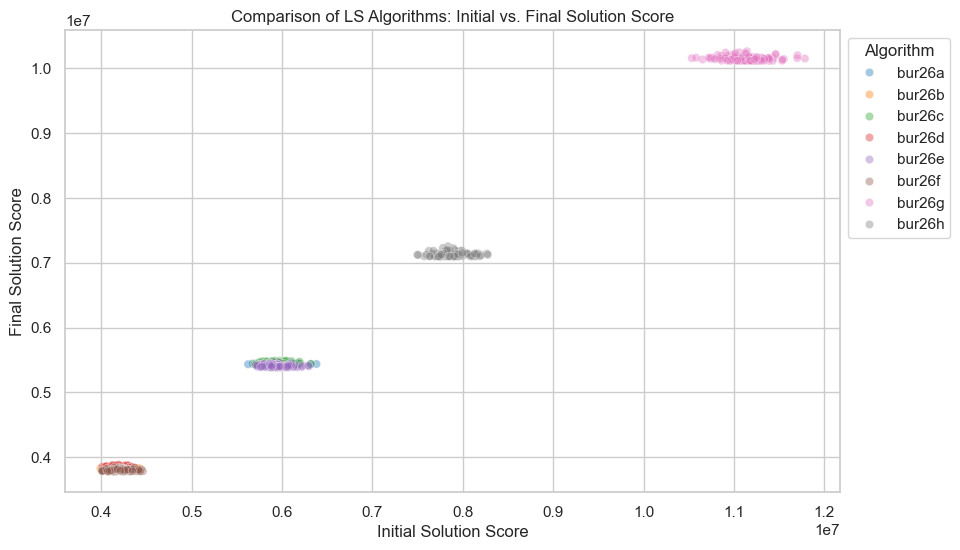

In [223]:
plot_ls_algorithms_comparison(df_performance[df_performance["Algorithm"].str.contains("steepestLS", case=False, na=False)])


## Number of Restarts Influence

## Similarity of Locally Optimal Solutions